In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv("Google_Stock_Price_Train.csv")
train=dataset.iloc[:,1:2].values

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
train=sc.fit_transform(train)

In [4]:
x_train=[]
y_train=[]

In [5]:
for i in range(60,1258):
    x_train.append(train[i-60:i,0])
    y_train.append(train[i,0])

In [6]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_train= np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [8]:
model= Sequential()

In [9]:
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [10]:
model.add(Dense(units = 1))

In [11]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=["mse"])

In [12]:
model.fit(x_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0390 - mse: 0.0390
Epoch 2/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0069 - mse: 0.0069
Epoch 3/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0055 - mse: 0.0055
Epoch 4/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0052 - mse: 0.0052
Epoch 5/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0054 - mse: 0.0054
Epoch 6/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0051 - mse: 0.0051
Epoch 7/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0052 - mse: 0.0052
Epoch 8/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0049 - mse: 0.0049
Epoch 9/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0047 - mse: 0.0047
Epoch 10/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0043 - mse: 0.0043
Epoch 11/100
1198/

1198/1198 [==============================] - 3s 3ms/step - loss: 0.0018 - mse: 0.0018
Epoch 82/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0016 - mse: 0.0016
Epoch 83/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0017 - mse: 0.0017
Epoch 84/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0016 - mse: 0.0016
Epoch 85/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0015 - mse: 0.0015
Epoch 86/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0015 - mse: 0.0015
Epoch 87/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0015 - mse: 0.0015
Epoch 88/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0015 - mse: 0.0015
Epoch 89/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0015 - mse: 0.0015
Epoch 90/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0015 - mse: 0.0015
Epoch 91/100
1198/1198 

In [13]:
train=pd.read_csv('Google_Stock_Price_Train.csv')
test= pd.read_csv('Google_Stock_Price_Test.csv')

In [14]:
dataset=pd.concat([ train, test])

In [15]:
dataset=dataset["Open"]

In [16]:
inputs = dataset[len(dataset) - len(test) - 60:]

In [17]:
np.array(inputs)

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [18]:
inputs=np.array(inputs).reshape(80,1)

In [19]:
inputs

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [20]:
inputs=sc.transform(inputs)

In [21]:
x_test = []
for i in range(60, 80):
    x_test.append(inputs[i-60:i, 0])

In [22]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [23]:
y_test=test.iloc[:,1:2].values

In [24]:
x_test.shape

(20, 60, 1)

In [25]:
y_pred = model.predict(x_test)
y_pred = sc.inverse_transform(y_pred)


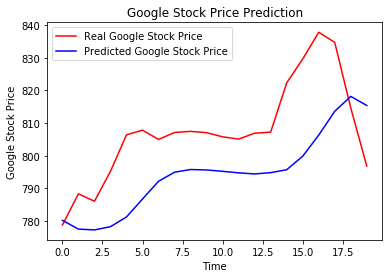

In [26]:
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()